In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv("/content/bank-additional-full.csv",delimiter=';')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
df.shape

(41188, 21)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [12]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [13]:
df.duplicated().sum()

12

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

In [16]:
df_obj= df.select_dtypes(include='object').columns

df_num= df.select_dtypes(exclude='object').columns

**DATA VISUALISATION**

**1. HISTOGRAM**

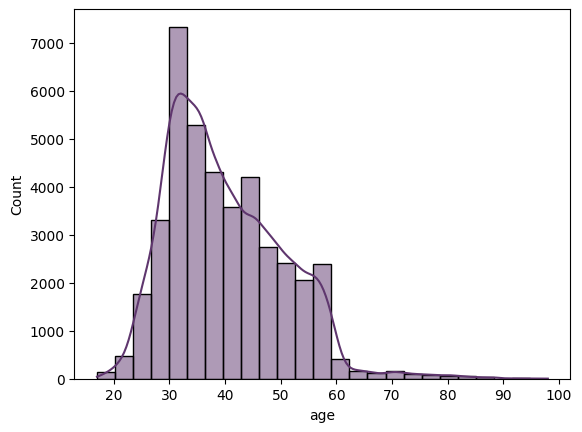

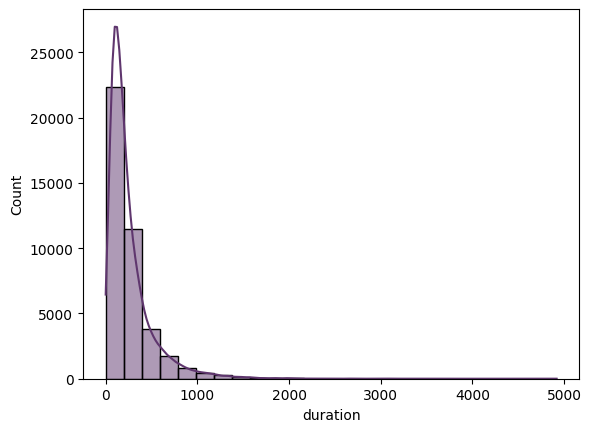

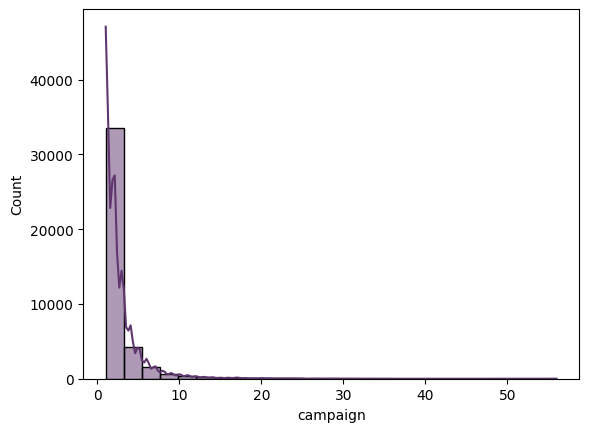

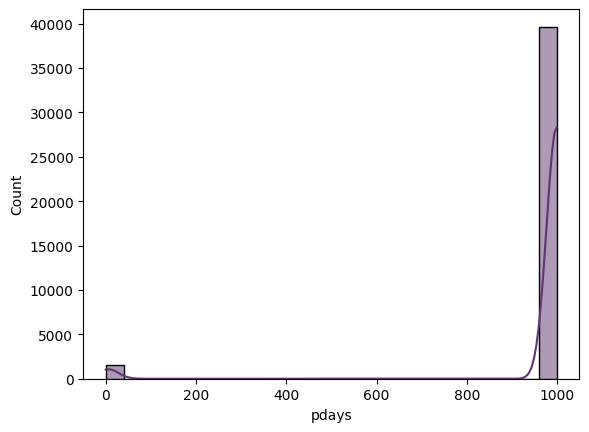

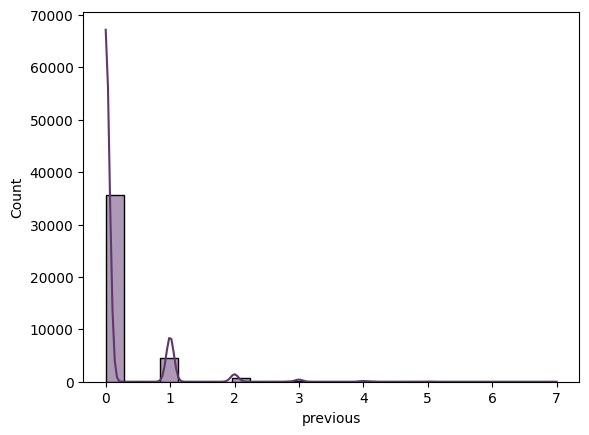

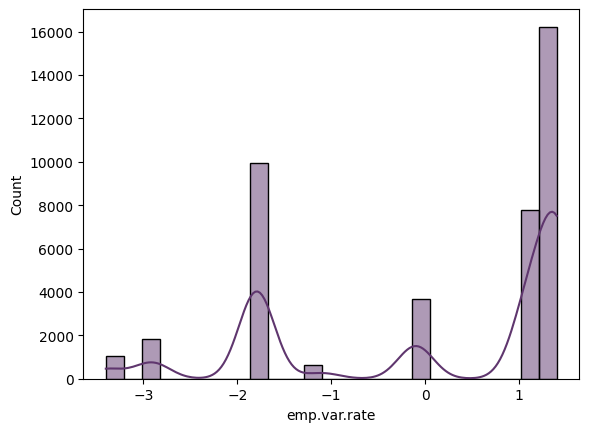

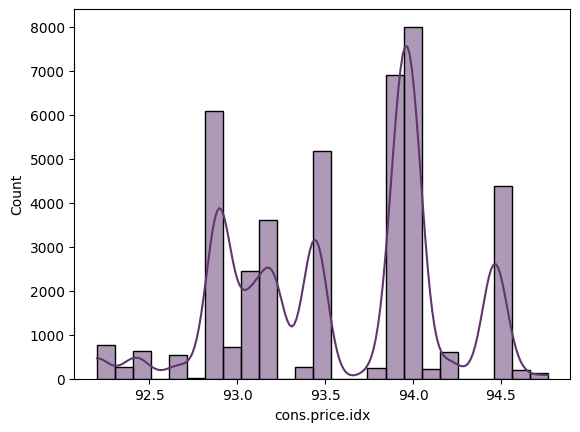

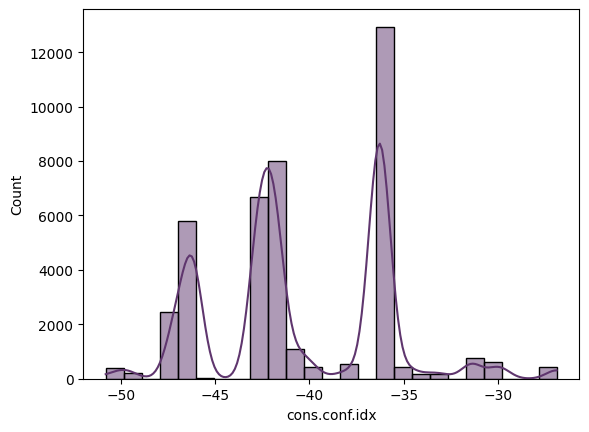

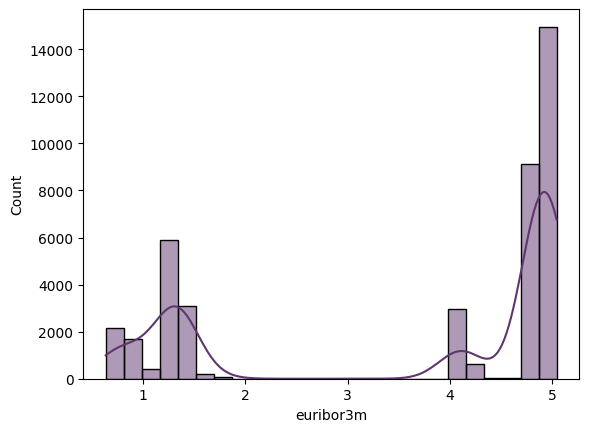

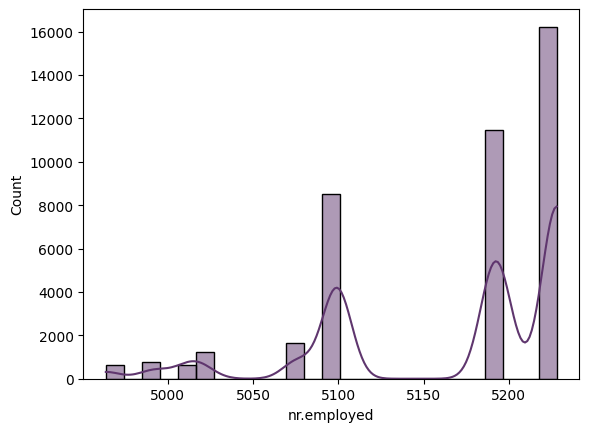

In [17]:
for tushar  in df_num:
    sns.histplot(x=tushar,data=df,bins=25,kde=True,color='#5f366e')
    plt.show()

**2. COUNT PLOT**

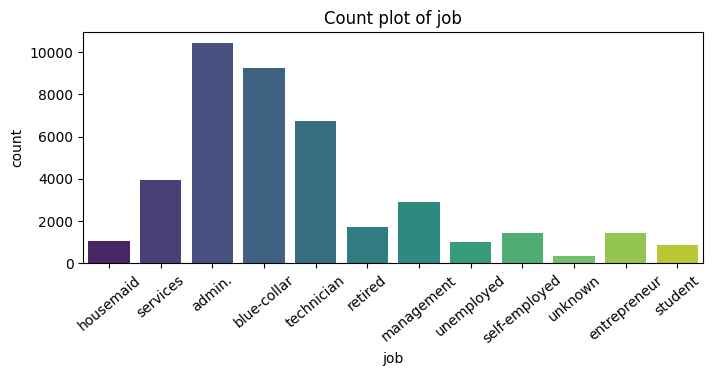

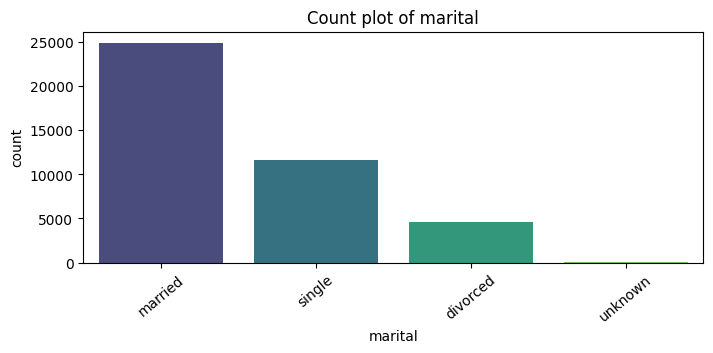

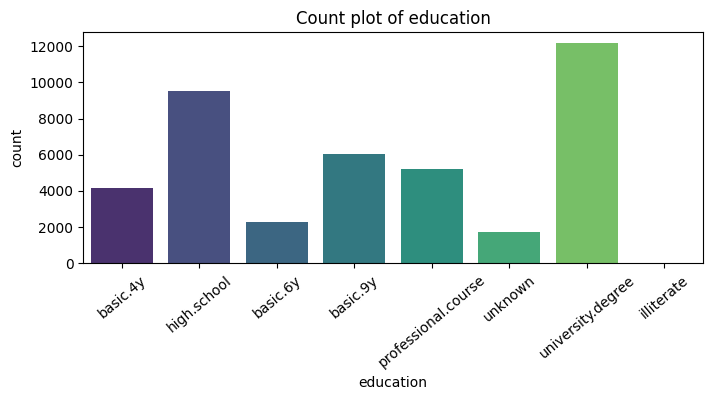

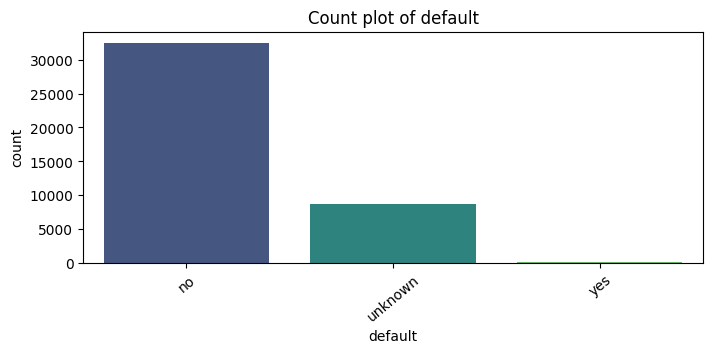

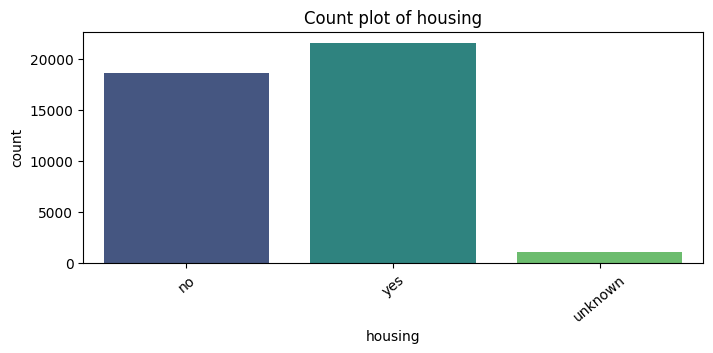

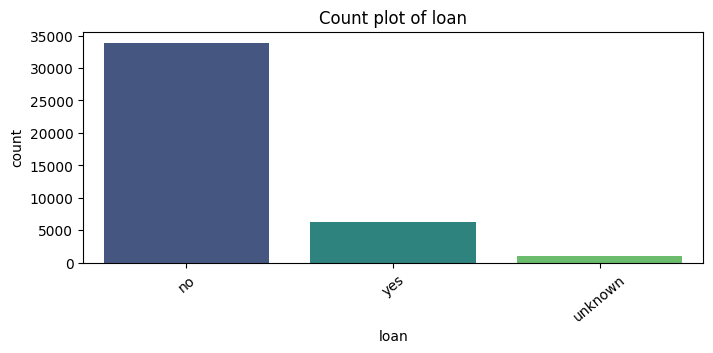

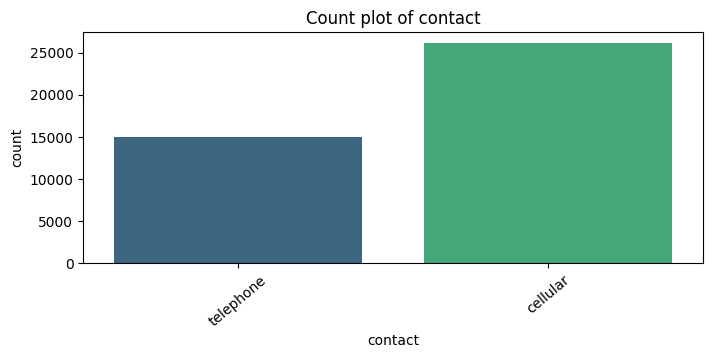

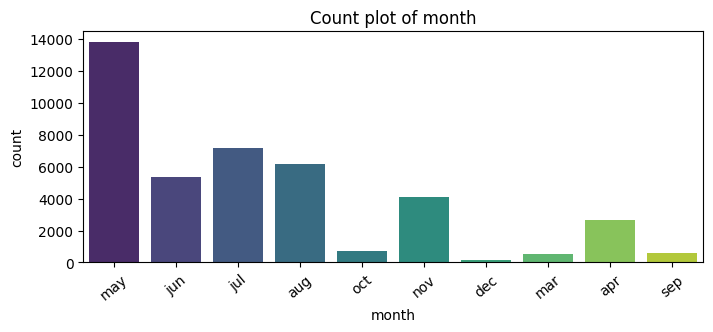

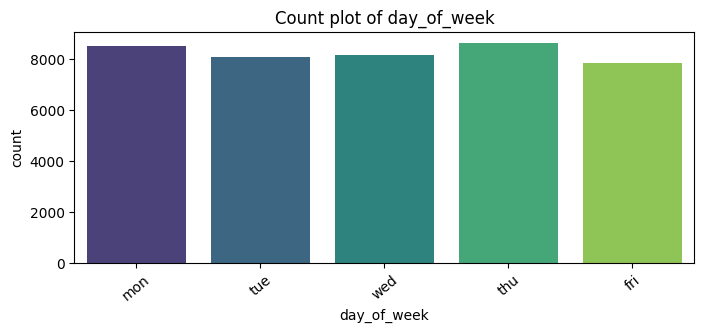

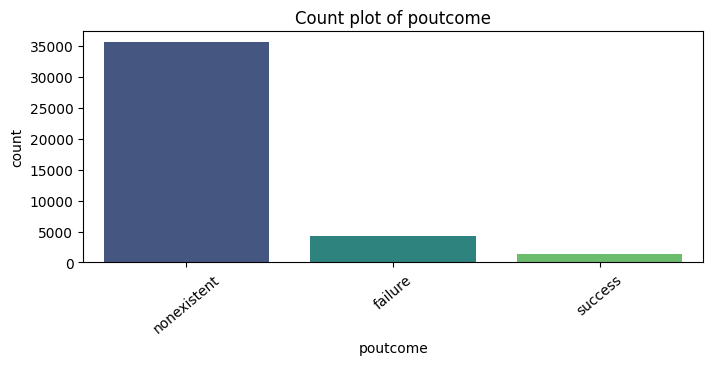

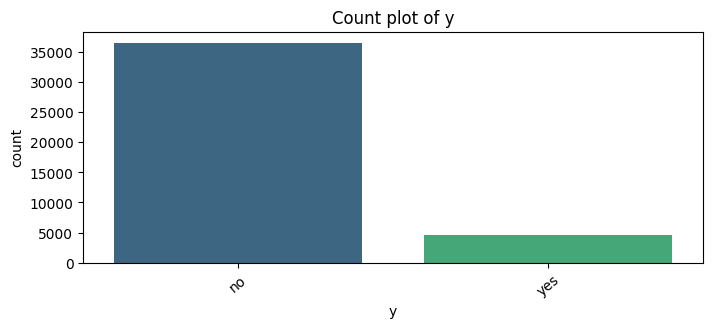

In [18]:
for tushar in df_obj:
    plt.figure(figsize=(8,3))
    plt.title(f"Count plot of {tushar}")
    sns.countplot(x=tushar,data=df,palette='')
    plt.xticks(rotation=40)
    plt.show()

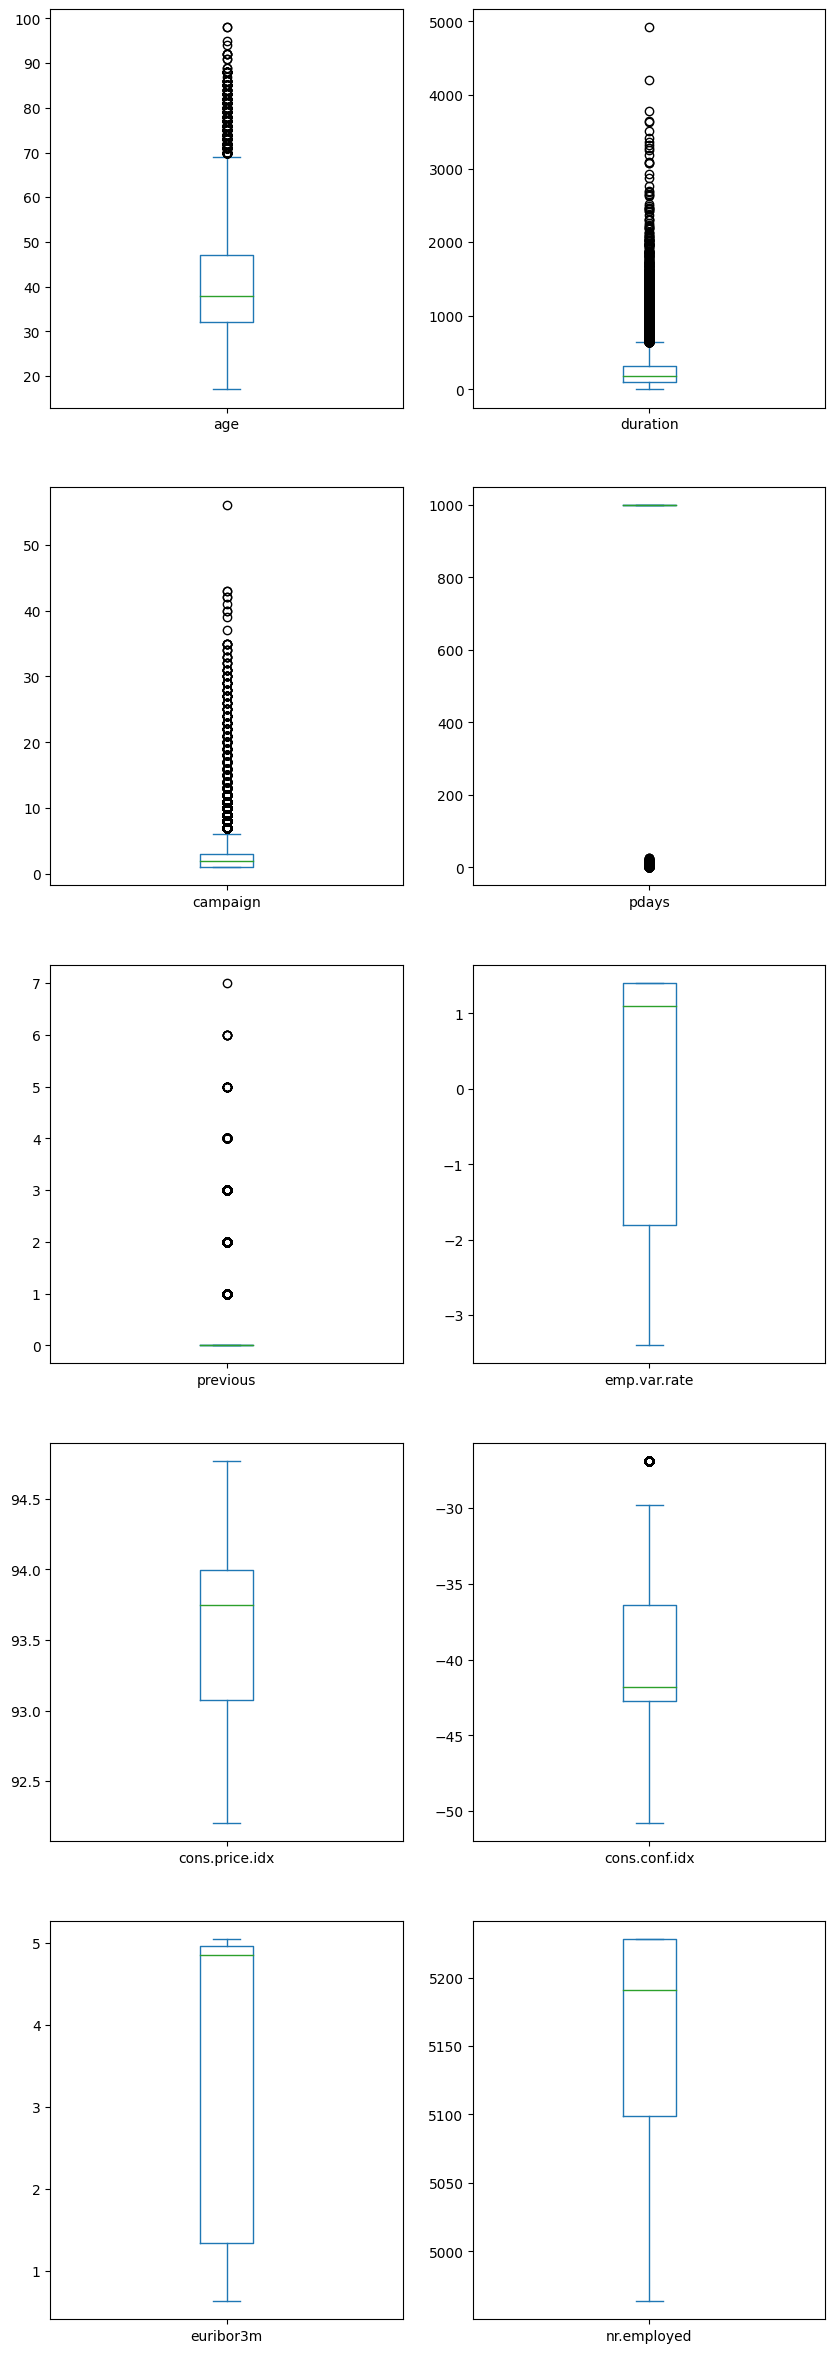

In [19]:
df.plot(kind='box', subplots=True, layout=(5,2), figsize=(10,30))
plt.show()

**3. HEATMAP**

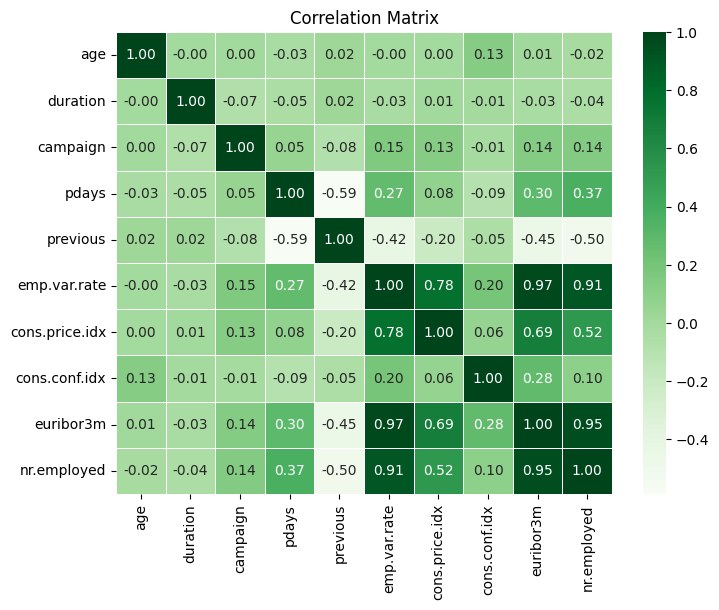

In [20]:
num_column = df.select_dtypes(include='number')
matrix = num_column.corr()

plt.figure(figsize =(8,6))
sns.heatmap(matrix, annot = True, cmap = 'Greens', fmt = '.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()


In [25]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Converting Categorical data into numerical data using label encoder**

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,26,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,56,5,1,5,0,2,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,26,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,26,0,1,5,25,0,171,0,1


In [26]:
df_encoded['y'].value_counts(normalize=True)*100

,proportion
y,
0,88.733728
1,11.266272


In [27]:
## independent variables
x = df_encoded.iloc[:,:-1]

## Target variable
y = df_encoded.iloc[:,-1]

**Splitting the dataset into train and test datasets**

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28823, 20)
(12353, 20)
(28823,)
(12353,)


**Decision Tree classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [30]:
dc = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [31]:
print("Training accuracy:",dc.score(x_train,y_train))
print("Testing accuracy:",dc.score(x_test,y_test))

Training accuracy: 0.9178086944454081
Testing accuracy: 0.9145146927871772


In [32]:
y_pred=dc.predict(x_test)

**Evaluating Prediction Accuracy**

In [33]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9145146927871772


In [34]:
print(confusion_matrix(y_test,y_pred))

[[10484   483]
 [  573   813]]


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10967
           1       0.63      0.59      0.61      1386

    accuracy                           0.91     12353
   macro avg       0.79      0.77      0.78     12353
weighted avg       0.91      0.91      0.91     12353



**Plotting Decision Tree**

In [36]:
from sklearn.tree import plot_tree

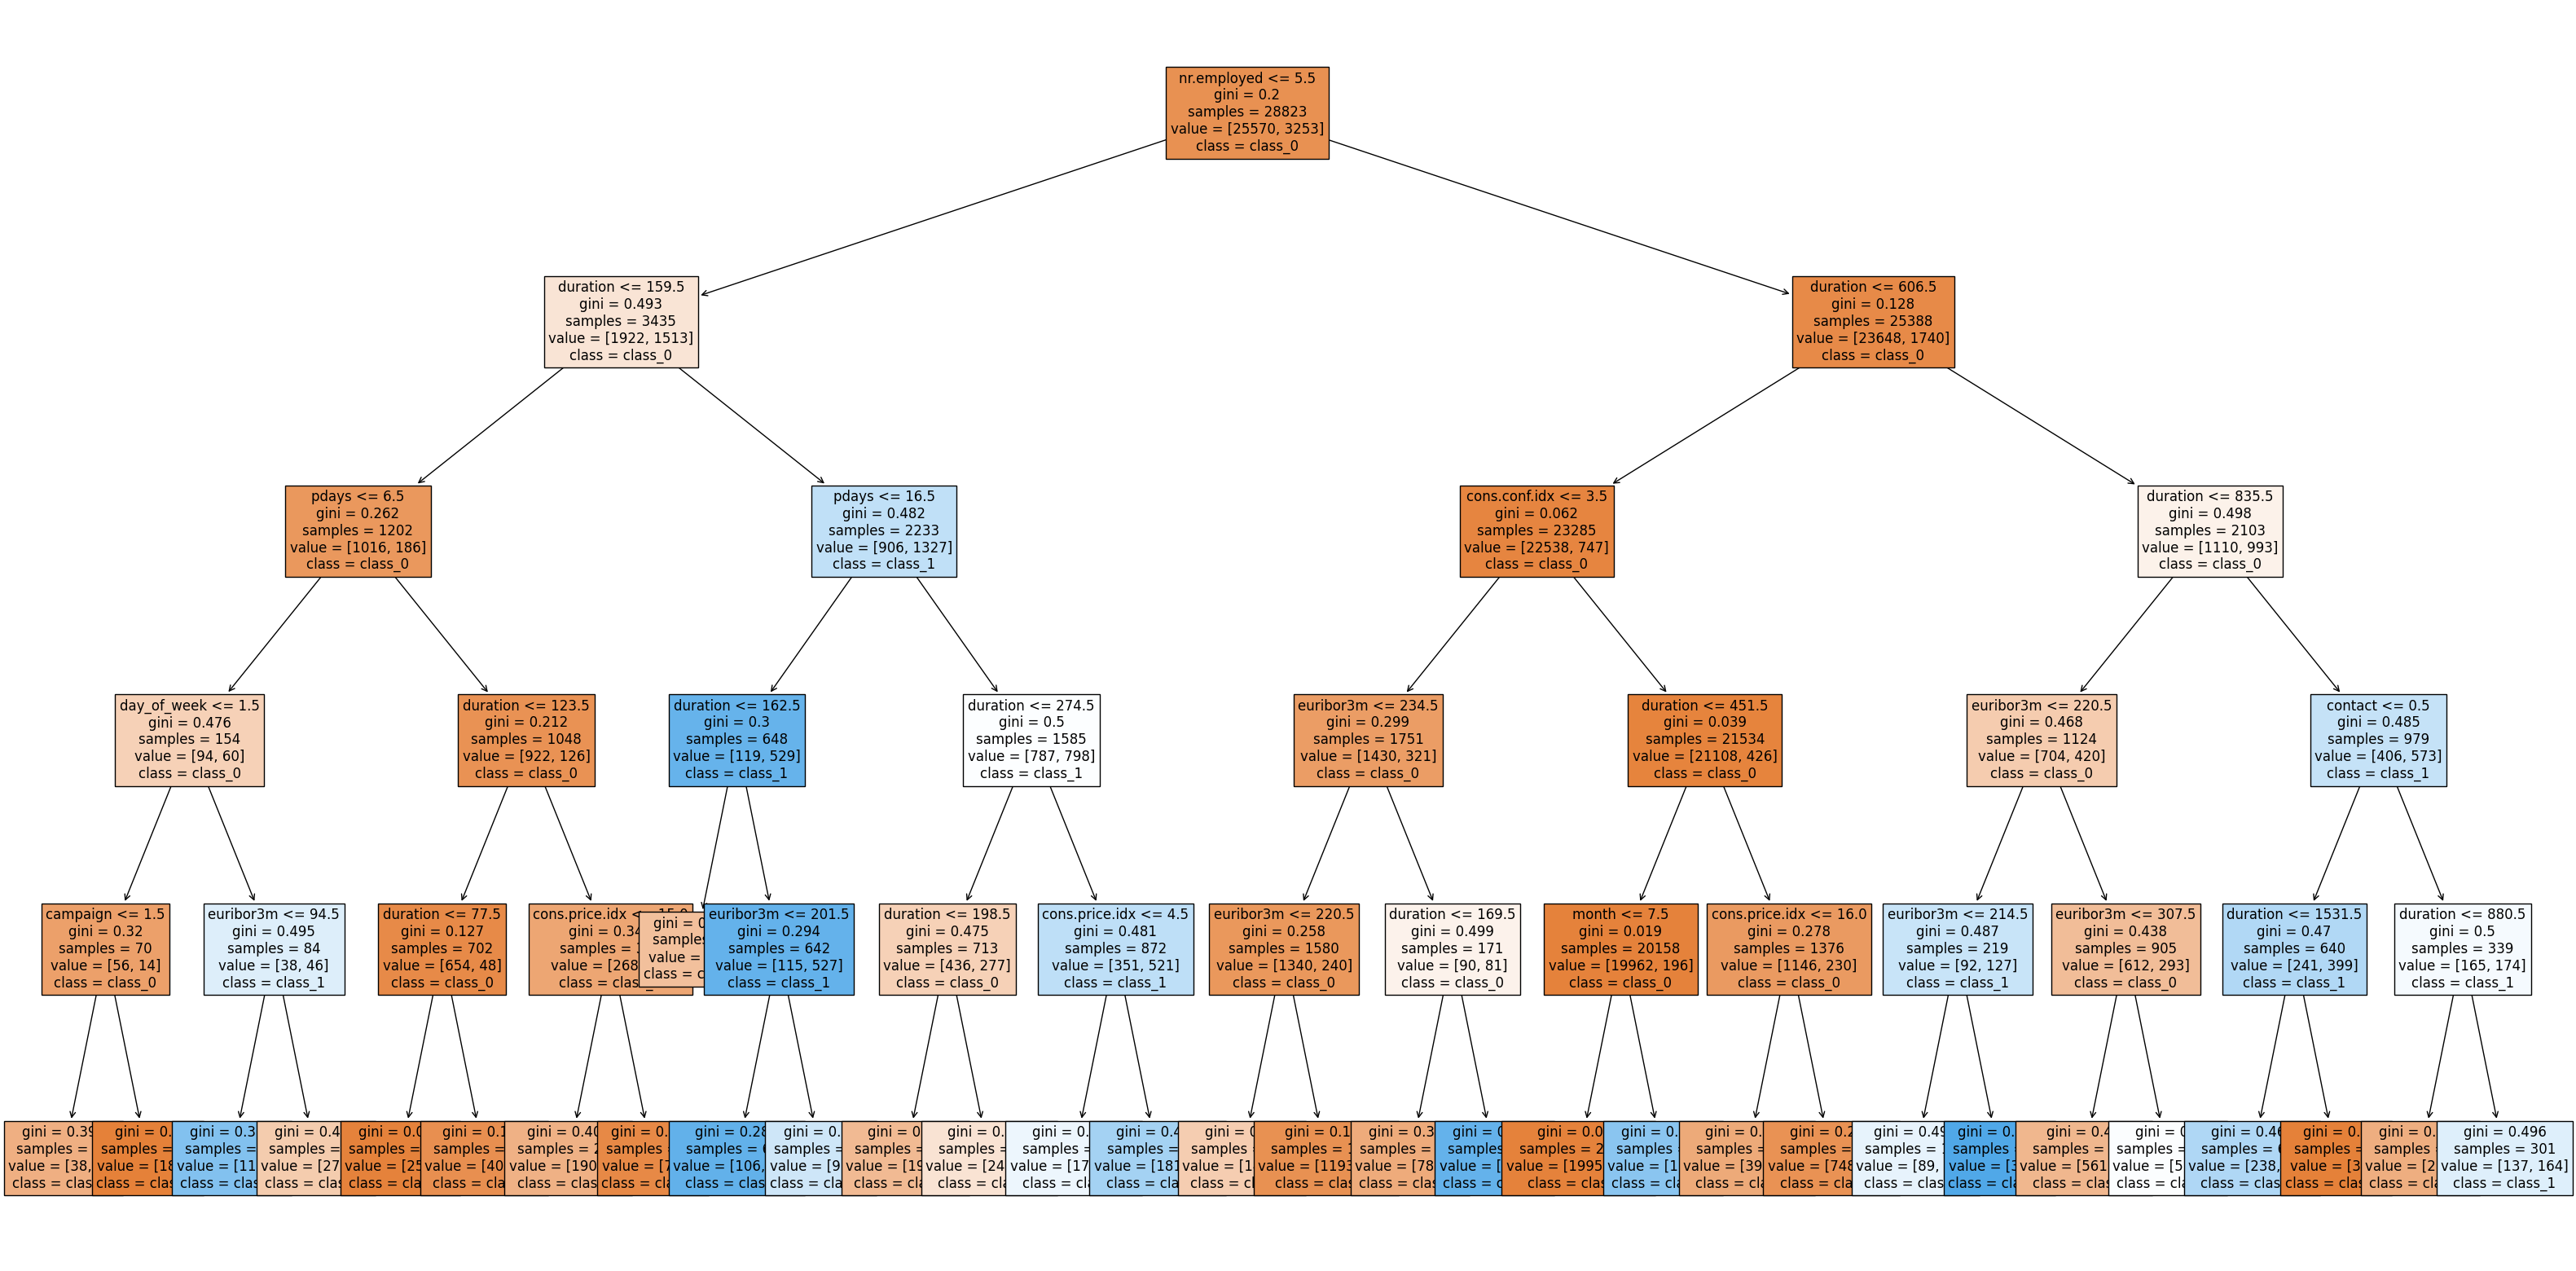

In [37]:
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=12)
plt.show()

**Using Entropy Criterion**

In [38]:
dc1=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

In [39]:
print("Training accuracy:",dc1.score(x_train,y_train))
print("Testing accuracy:",dc1.score(x_test,y_test))

Training accuracy: 0.9167678590014918
Testing accuracy: 0.9133813648506436


In [40]:
y1_pred=dc1.predict(x_test)

**Evaluating Prediction Accuracy**

In [41]:
print(accuracy_score(y_test,y1_pred))

0.9133813648506436


In [42]:
print(confusion_matrix(y_test,y1_pred))

[[10477   490]
 [  580   806]]


In [43]:
print(classification_report(y_test,y1_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     10967
           1       0.62      0.58      0.60      1386

    accuracy                           0.91     12353
   macro avg       0.78      0.77      0.78     12353
weighted avg       0.91      0.91      0.91     12353



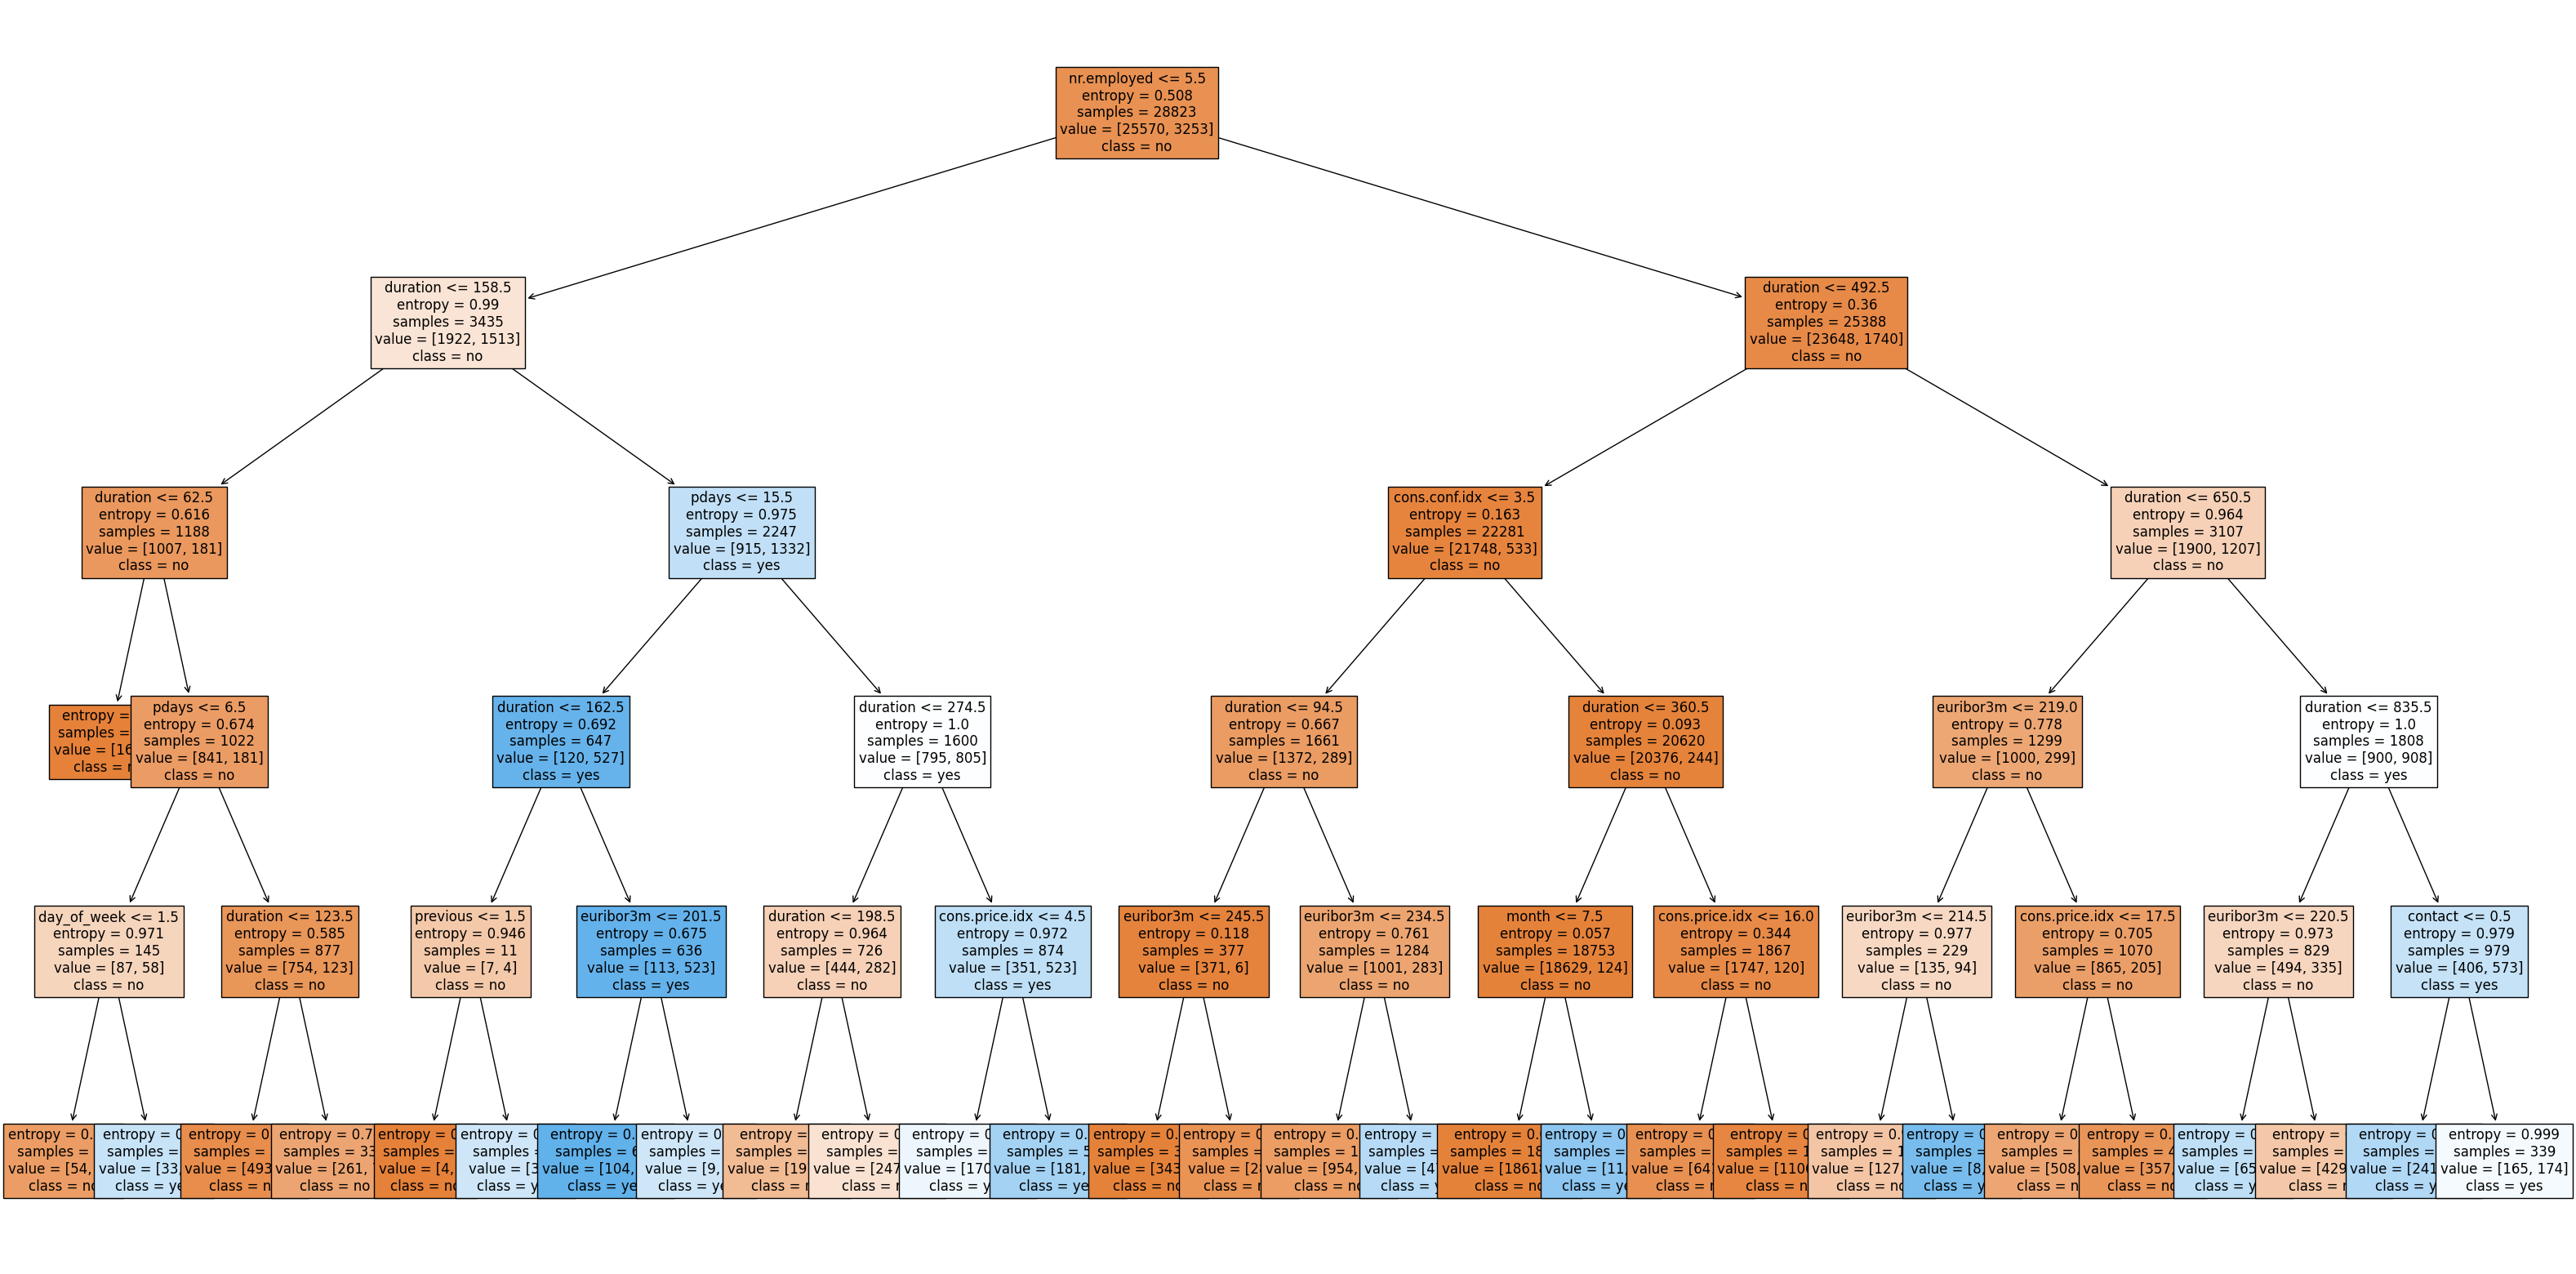

In [44]:
cn=['no','yes']
fn=x_train.columns
plt.figure(figsize=(40,20))
plot_tree(dc1, feature_names=fn.tolist(), class_names=cn, filled=True,fontsize=12)
plt.show()

High Accuracy for Both Criteria: Both the Gini impurity and entropy criteria provide high accuracy for training and testing, with training accuracies around 93.6% and testing accuracies around 93.3% for Gini and 93.2% for entropy.

Performance Metrics Comparison:

The Gini criterion has a slightly higher testing accuracy and a better recall for the positive class (1), indicating it is better at identifying true positive instances.
The entropy criterion results in fewer false positives but more false negatives compared to Gini. **bold text**